数据已保存为 '模拟销售数据.csv'


<Figure size 1200x600 with 0 Axes>

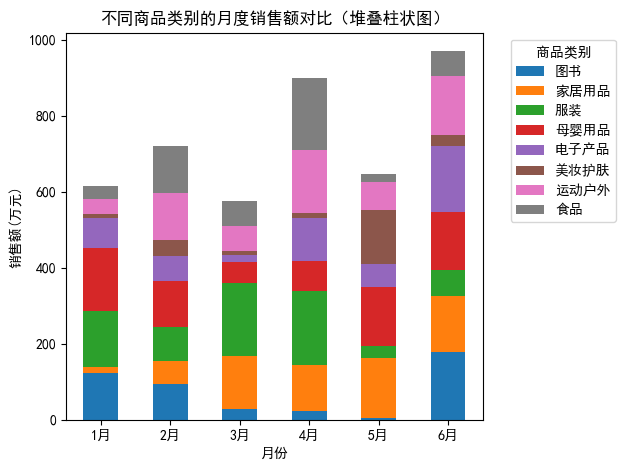

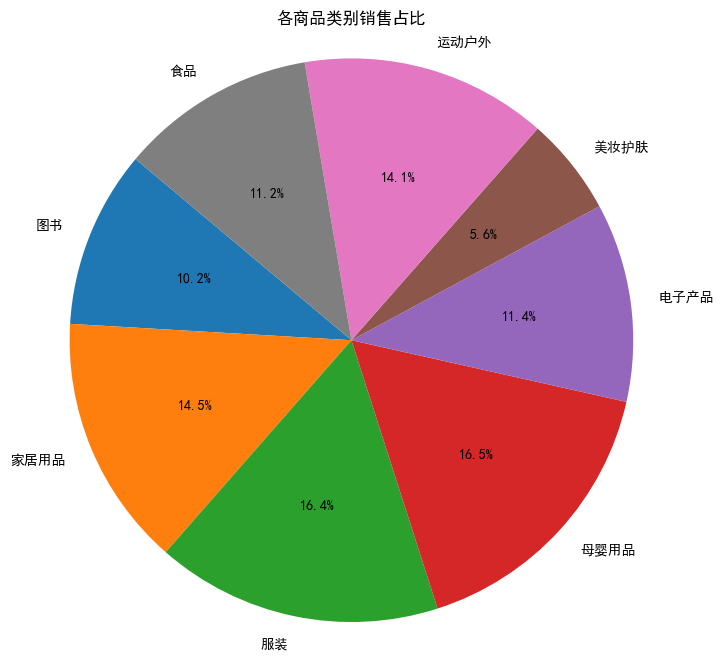

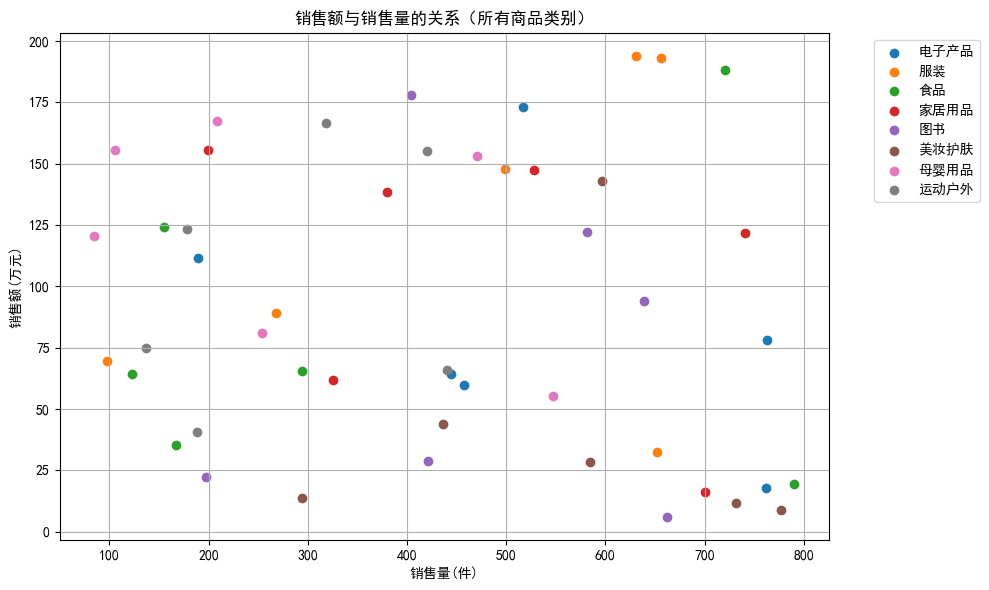

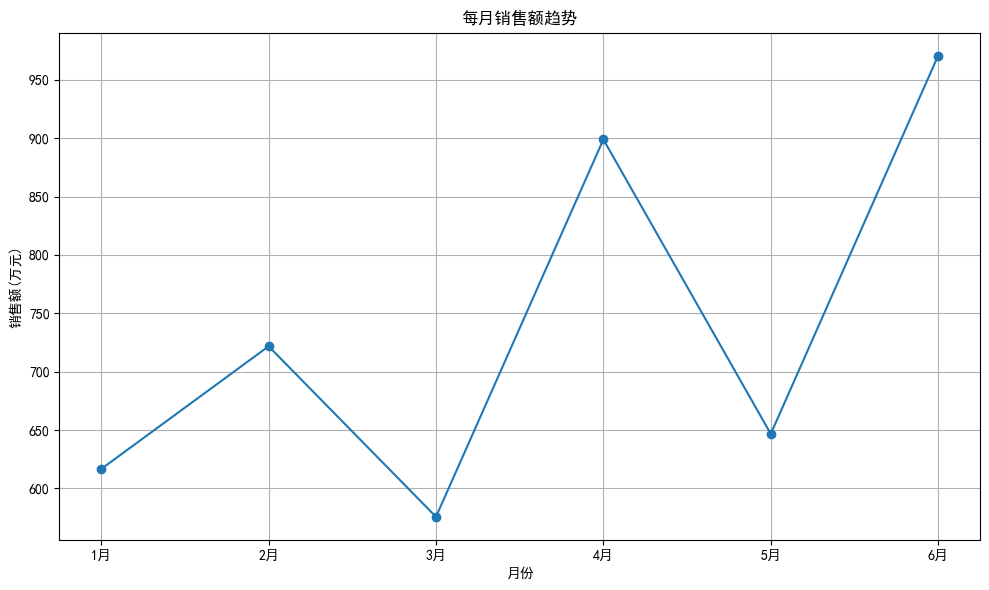

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
import platform

# --------------------------
# 设置中文字体兼容性
# --------------------------
def get_chinese_font():
    """
    根据当前操作系统自动选择合适的中文字体
    返回找到的第一个可用中文字体名称，若无则返回None并提示警告
    """
    system = platform.system()  # 获取当前操作系统类型
    fm = FontManager()  # 创建字体管理器
    mat_fonts = set(f.name for f in fm.ttflist)  # 获取当前系统中所有可用的字体名称

    # 按优先级排序的常见中文字体列表
    chinese_fonts = [
        'SimHei',               # Windows系统常见中文字体
        'Microsoft YaHei',      # Windows系统常见中文字体
        'Arial Unicode MS',     # macOS系统常见中文字体
        'PingFang SC',          # macOS系统常见中文字体
        'Noto Sans CJK JP',     # Linux系统常见中文字体
        'WenQuanYi Zen Hei'     # Linux系统常见中文字体
    ]

    # 找出系统中已安装的中文字体
    available = mat_fonts.intersection(chinese_fonts)
    if available:
        return available.pop()  # 返回找到的第一个可用字体
    else:
        print("警告：未找到合适的中文字体，中文可能显示为方框")
        return None

# 获取适合当前系统的中文字体
chinese_font = get_chinese_font()
if chinese_font:
    plt.rcParams['font.sans-serif'] = [chinese_font]  # 设置matplotlib使用该字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示异常问题

# --------------------------
# 生成模拟销售数据
# --------------------------
# 定义商品类别和月份范围
categories = ['电子产品', '服装', '食品', '家居用品', '图书', '美妆护肤', '母婴用品', '运动户外']
months = ['1月', '2月', '3月', '4月', '5月', '6月']

# 初始化数据字典
data = {
    '月份': [],
    '商品类别': [],
    '销售额(万元)': [],
    '销售量(件)': []
}

# 设置随机种子保证结果可复现
np.random.seed(42)

# 循环生成每个月份下每个商品类别的模拟销售数据
for month in months:
    for category in categories:
        # 随机生成销售额（5-200万元之间，保留2位小数）
        sales = round(np.random.uniform(5, 200), 2)
        # 随机生成销售量（50-800件之间，取整）
        quantity = round(np.random.uniform(50, 800), 0)
        # 将生成的数据添加到字典中
        data['月份'].append(month)
        data['商品类别'].append(category)
        data['销售额(万元)'].append(sales)
        data['销售量(件)'].append(quantity)

# 将字典转换为DataFrame
df = pd.DataFrame(data)

# --------------------------
# 数据导出
# --------------------------
# 将生成的模拟数据保存为CSV文件，使用utf-8-sig编码支持中文
df.to_csv('模拟销售数据.csv', index=False, encoding='utf-8-sig')
print("数据已保存为 '模拟销售数据.csv'")

# --------------------------
# 可视化分析
# --------------------------

# 4.1 不同商品类别的月度销售额对比（堆叠柱状图）
# 按月份和商品类别分组，计算每个组合的销售额总和，并将结果转换为宽格式
monthly_sales = df.groupby(['月份', '商品类别'])['销售额(万元)'].sum().unstack()

# 创建堆叠柱状图
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', stacked=True)
plt.title('不同商品类别的月度销售额对比（堆叠柱状图）')
plt.xlabel('月份')
plt.ylabel('销售额(万元)')
plt.xticks(rotation=0)  # 月份标签不需要旋转
plt.legend(title='商品类别', bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例放在图表右侧
plt.tight_layout()  # 自动调整子图参数，避免标签重叠
plt.show()

# 4.2 各商品类别销售占比（饼图）
# 按商品类别分组，计算每个类别的销售额总和
category_sales = df.groupby('商品类别')['销售额(万元)'].sum()

# 创建饼图
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('各商品类别销售占比')
plt.axis('equal')  # 保证饼图为正圆形
plt.show()

# 4.3 销售额与销售量的关系（所有类别散点图）
# 创建散点图，展示所有商品类别的销售额与销售量关系
plt.figure(figsize=(10, 6))
for category in categories:
    # 筛选出当前类别的数据子集
    subset = df[df['商品类别'] == category]
    # 绘制散点图，不同类别用不同颜色区分
    plt.scatter(subset['销售量(件)'], subset['销售额(万元)'], label=category)

plt.title('销售额与销售量的关系（所有商品类别）')
plt.xlabel('销售量(件)')
plt.ylabel('销售额(万元)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例放在图表右侧
plt.grid(True)  # 显示网格线
plt.tight_layout()  # 自动调整子图参数
plt.show()

# 4.4 每月销售额趋势（折线图）
# 按月份分组，计算每月的销售额总和
monthly_total = df.groupby('月份')['销售额(万元)'].sum()

# 创建折线图，展示每月销售额变化趋势
plt.figure(figsize=(10, 6))
monthly_total.plot(kind='line', marker='o')  # 使用圆点标记数据点
plt.title('每月销售额趋势')
plt.xlabel('月份')
plt.ylabel('销售额(万元)')
plt.grid(True)  # 显示网格线
plt.tight_layout()  # 自动调整子图参数
plt.show()